<a href="https://colab.research.google.com/github/rahmanziaur/EDGEICT/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 2.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


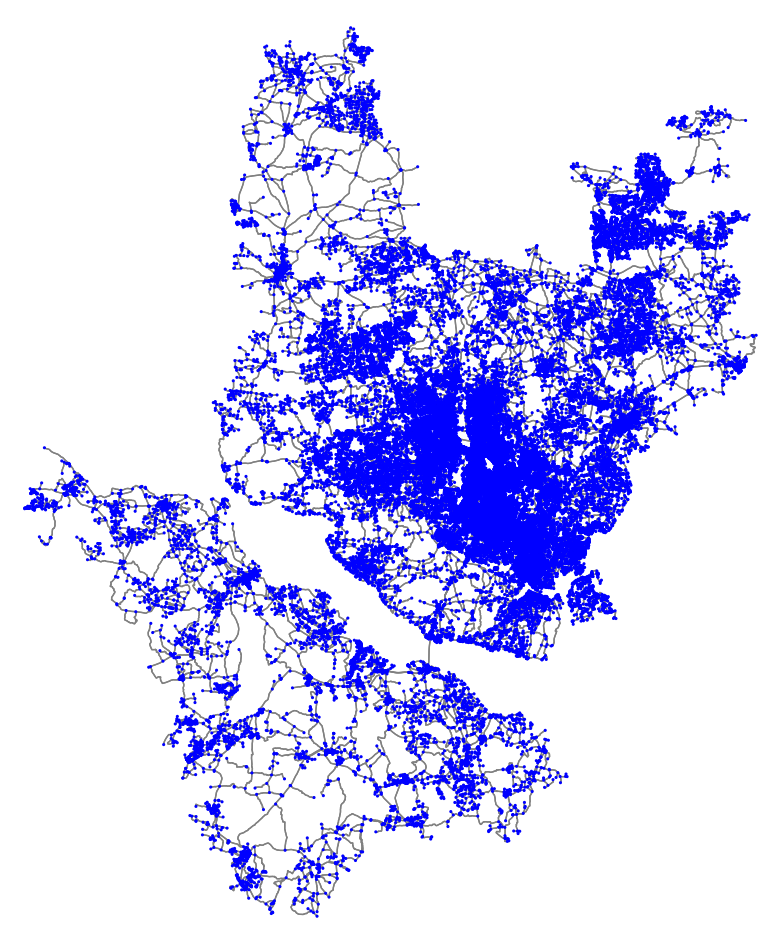

<Figure size 640x480 with 0 Axes>

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt

# Download the road network for Chicago including all types of roads
G_all = ox.graph_from_place('Dhaka, Bangladesh', network_type='drive')

# Plot using osmnx's built-in plotting method
fig, ax = ox.plot_graph(G_all, node_size=5, node_color='blue', edge_color='gray', bgcolor='white', figsize=(12, 12))

# Save the figure as a high-resolution image
plt.savefig('dhaka_all_road_network.svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [4]:
import osmnx as ox
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time

# Initialize geolocator with a user agent
geolocator = Nominatim(user_agent="teesta_dam_locator")

# List of dam names with additional context to improve geocoding accuracy
dam_list = [
    "Bhasme Dam, Teesta River",
    "Panan Dam, Teesta River",
    "Dikchhu Dam, Teesta River",
    "Chuzachen Dam, Teesta River",
    "Jorethang Loop Dam, Teesta River",
    "Tashiding Dam, Teesta River",
    "Rongni Dam, Teesta River",
    "Teesta III Dam",
    "Teesta IV Dam",
    "Teesta VI Dam",
    "Teesta Low Dam III",
    "Teesta Low Dam IV",
    "Rangit III Dam, Teesta River",
    "Teesta V Dam",
    "Dalia Dam, Teesta River",
    "Gajol Doba Dam, Teesta River"
]

# Geocode each dam and store the name with its latitude and longitude
dam_locations = []
for dam in dam_list:
    location = geolocator.geocode(dam)
    if location:
        dam_locations.append((dam, location.latitude, location.longitude))
        print(f"Geocoded: {dam} -> ({location.latitude}, {location.longitude})")
    else:
        print(f"Could not geocode {dam}")
    time.sleep(1)  # Respect Nominatim's usage policy

# Define an approximate bounding box for the Teesta River region (adjust as needed)
north, south, east, west = 27.0, 25.0, 88.0, 86.0

# Get a base map graph from the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# Plot the base map using OSMnx's plotting functionality
fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0, edge_color="#999999", bgcolor='w', figsize=(12,12))

# Plot dam locations on the base map
for dam, lat, lon in dam_locations:
    ax.plot(lon, lat, 'ro', markersize=8)
    ax.text(lon, lat, dam, fontsize=8, ha='right', va='bottom')

plt.title("Teesta River Region - Dam Locations")
plt.savefig("teesta_dams.png", dpi=300, bbox_inches='tight')
plt.show()


Could not geocode Bhasme Dam, Teesta River
Could not geocode Panan Dam, Teesta River
Could not geocode Dikchhu Dam, Teesta River
Could not geocode Chuzachen Dam, Teesta River
Could not geocode Jorethang Loop Dam, Teesta River
Could not geocode Tashiding Dam, Teesta River
Could not geocode Rongni Dam, Teesta River
Geocoded: Teesta III Dam -> (27.0016021, 88.44300910467865)
Geocoded: Teesta IV Dam -> (26.92748925, 88.45717466557485)
Could not geocode Teesta VI Dam
Geocoded: Teesta Low Dam III -> (27.0016021, 88.44300910467865)
Geocoded: Teesta Low Dam IV -> (26.92748925, 88.45717466557485)
Could not geocode Rangit III Dam, Teesta River
Could not geocode Teesta V Dam
Could not geocode Dalia Dam, Teesta River
Could not geocode Gajol Doba Dam, Teesta River


TypeError: graph_from_bbox() takes 1 positional argument but 4 positional arguments (and 1 keyword-only argument) were given

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


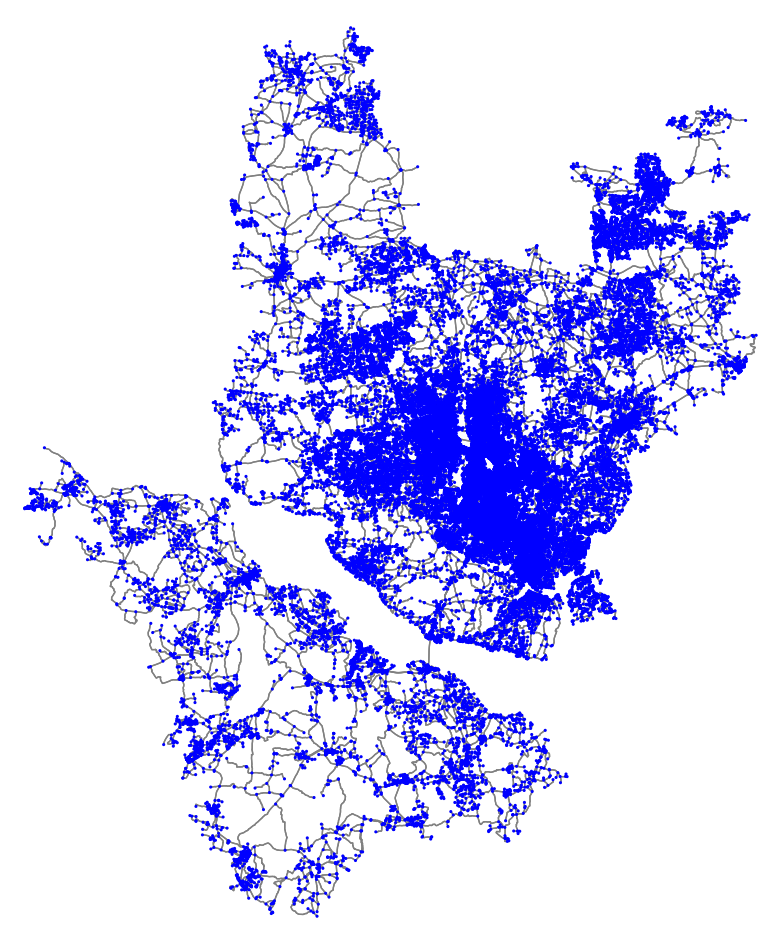

<Figure size 640x480 with 0 Axes>

TypeError: graph_from_bbox() takes 1 positional argument but 4 positional arguments (and 1 keyword-only argument) were given

In [5]:
# prompt: remove the location that cannot be coded and regenerate

import osmnx as ox
import matplotlib.pyplot as plt
import time
!pip install osmnx

# Download the road network for Dhaka
G_all = ox.graph_from_place('Dhaka, Bangladesh', network_type='drive')

# Plot the road network
fig, ax = ox.plot_graph(G_all, node_size=5, node_color='blue', edge_color='gray', bgcolor='white', figsize=(12, 12))

# Save the plot
plt.savefig('dhaka_road_network.png', dpi=300, bbox_inches='tight')
plt.show()

# Example dam locations (replace with actual coordinates)
dam_locations = {
    "Bhasme Dam": (26.5, 88.5),
    "Panan Dam": (26.7, 88.3),
    "Dikchhu Dam": (26.9, 88.1),
    # Add other dams with their coordinates
}

# Define a bounding box for the map
north, south, east, west = 27.0, 25.0, 89.0, 87.0

# Get the map
G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# Plot the map
fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0, edge_color="#999999", bgcolor='w', figsize=(12, 12))

# Plot the dam locations on the map
for dam_name, (lat, lon) in dam_locations.items():
    ax.plot(lon, lat, 'ro', markersize=8)
    ax.text(lon, lat, dam_name, fontsize=8, ha='right', va='bottom')

plt.title("Teesta River Region - Dam Locations (Example)")
plt.savefig("teesta_dams.png", dpi=300, bbox_inches='tight')
plt.show()
